In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir

#music imports
from music21 import converter, key
import pretty_midi
# folder
data_dir = './data/instrument/'

## METADATA about the dataset
Summary: lots of beethoven, most common instrument is solo piano but there is also string, and woodwind instruments.

In [2]:
# data
metadata_df = pd.read_csv(data_dir+"musicnet_metadata.csv")
print("number of data entries", len(metadata_df))
# print("features", metadata_df.columns.to_list())
metadata_df.head()

number of data entries 330


,id,composer,composition,movement,ensemble,source,transcriber,catalog_name,seconds
0,1727,Schubert,Piano Quintet in A major,2. Andante,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,447
1,1728,Schubert,Piano Quintet in A major,3. Scherzo: Presto,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,251
2,1729,Schubert,Piano Quintet in A major,4. Andantino - Allegretto,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,444
3,1730,Schubert,Piano Quintet in A major,5. Allegro giusto,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,368
4,1733,Schubert,Piano Sonata in A major,2. Andantino,Solo Piano,Museopen,Segundo G. Yogore,D959,546


<Axes: ylabel='ensemble'>

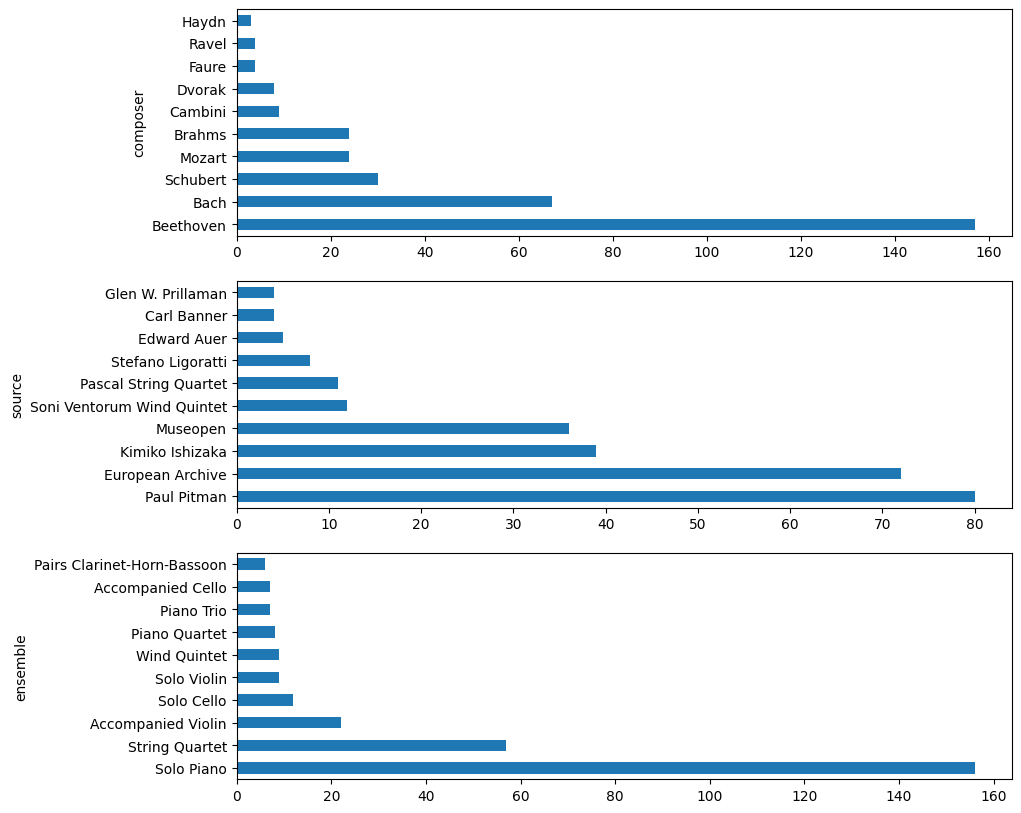

In [24]:
#plot all of these in one figure
fig, axs = plt.subplots(3,1, figsize=(10, 10))
metadata_df['composer'].value_counts().head(10).plot(kind='barh', ax=axs[0])
metadata_df['source'].value_counts().head(10).plot(kind='barh', ax=axs[1])
metadata_df['ensemble'].value_counts().head(10).plot(kind='barh', ax=axs[2])

## Understanding the data (.mid files)
First I organized all of the filenames under each composer in my data. Then I explored how to extract information from each of the .mid files. These files store the music information for the pieces.

In [4]:
#save the different values
composer_names = metadata_df['composer'].unique()
composer_files = {}
for composer_name in composer_names:
    composer_dir = data_dir+"musicnet_midis/musicnet_midis/"+composer_name
    composer_files[composer_name] = [composer_dir+"/"+fname for fname in listdir(composer_dir)]

# print(composer_files)
print(composer_names)

['Schubert' 'Mozart' 'Dvorak' 'Cambini' 'Haydn' 'Brahms' 'Faure' 'Ravel'
 'Bach' 'Beethoven']


In [ ]:
def process_mid_file(filename):
    midi_data = pretty_midi.PrettyMIDI(filename)
    tempo, beat_times = midi_data.get_tempo_changes()
    duration =  midi_data.get_end_time()
    score = converter.parse(filename)
    key = score.analyze('key')

    # instrument info
    instruments_data =[ ]
    for instrument in midi_data.instruments:
        start_times = [note.start for note in instrument.notes]
        pitches = [note.pitch for note in instrument.notes]

        # save all he info of the instrument
        instrument_info = {'name':instrument.name,
         'program':instrument.program,
         'drum':instrument.is_drum,
         'start_times':start_times,
         'pitches':pitches
         }
        instruments_data.append(instrument_info)
        
    # save it all in an object to summarizee
    file_data = {
        ''
    }
    plt.scatter(start_times, pitches, alpha=0.6, label=instrument.name)
    plt.xlabel("Time (s)")
    plt.ylabel("MIDI Pitch")
    plt.title("Note Onsets")
    plt.legend()
    plt.show()

    